# Has Fandango Continued to Inflate Movie Ratings?
<p>In 2015, statistical journalist Mark Hickey published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) claiming that Fandango, the popular movie ratings website/app, was inflating movie ratings with suspect rounding. By inspecting the raw rating values of the movies under the hood, he revealed that in the case of many movies, the number of stars increased by an entire half star. A Fandango representative claimed that this was due to a bug and would be fixed as soon as possible.</p>

<p>In this study, I will determine whether Fandango's rating displays are still biased or if the problem has been fixed.</p>

### The Available Data
<p>I've collected data from a public repository. The data includes the ratings that Hickey used in his analysis and data from after he published his article (2016-2017).</p>

<p>The data collected is not a completely random sample; it only includes "popular" movies, or movies with at least 30 fan ratings. So, we will adjust our goal to be finding whether Fandango ratings for popular movies have changed from 2015 to 2016.</p>

In [2]:
import pandas as pd
pd.options.display.max_columns = 100

old = pd.read_csv('fandango_score_comparison.csv')
new = pd.read_csv('movie_ratings_16_17.csv')

old.shape[0], new.shape[0]

(146, 214)

<p>The data from before the analysis contains 146 movies and the data from after the analysis contains 214 movies.</p>

In [3]:

old.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
new.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


<p>We need to isolate the relevant data since "old" contains a lot of information about other movie sites</p>

In [5]:
fandango_previous = old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = new[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


<p>The table "fandango_previous" contains data about Fandango ratings before Hickey's analysis. The table "fandango_after" contains information gathered after the analysis. By comparing these two datasets, we can determine whether the Fandango ratings have changed from 2015 to 2016.</p>

### Checking the Representativity of the Sample

<p>Unfortunately, the data given for movies in 2016 does not include the number of fan votes each movie received. Therefore, it is more difficult to tell whether the sample accurately represents "popular" movies with >30 votes. We should check that the sample is representative of popular movies because we are comparing it to the specific population of popular movies in 2015.</p>

<p>To do this, I'll sample 10 random movies and see what ratio of them have at least 30 fan reviews on the Fandango website.</p>

In [7]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


<p>9 out of 10 had greater than 30 ratings, so we can be more confident that the sample represents the population.</p>

<p>We can also see that "fandango_previous" only includes movies with at least 30 ratings:</p>

In [8]:
(fandango_previous['Fandango_votes'] < 30).sum()


0

<p>We also want to isolate the year for the table "fandango_previous". We want to make sure we are only comparing 2015 movies with 2016 movies.</p>

In [9]:
fandango_previous['year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous['year'].value_counts()

year
2015    129
2014     17
Name: count, dtype: int64

<p>There are some movies from 2014, so let's get rid of those.</p>

In [10]:
fandango_previous = fandango_previous[fandango_previous['year'] == '2015']
fandango_previous['year'].value_counts()

year
2015    129
Name: count, dtype: int64

<p>I'll check the same for the other table.</p>

In [11]:
fandango_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [12]:
fandango_after = fandango_after[fandango_after['year'] == 2016]
fandango_after['year'].value_counts()

year
2016    191
Name: count, dtype: int64

## Comparing the Distributions of Fandango Reviews in 2015 vs. 2016

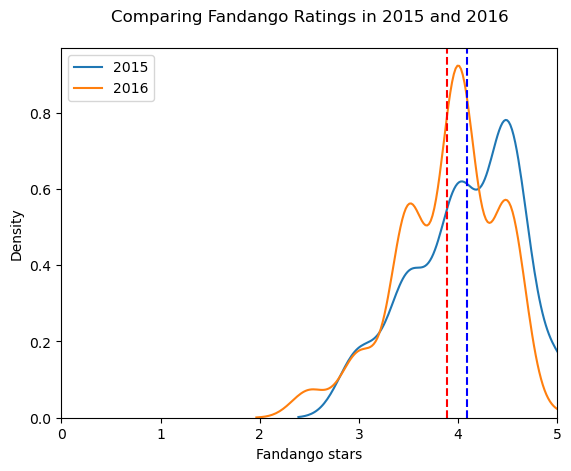

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.kdeplot(fandango_previous['Fandango_Stars'], label='2015')
sb.kdeplot(fandango_after['fandango'], label='2016')
plt.title('Comparing Fandango Ratings in 2015 and 2016', y = 1.05)
plt.xlim(0, 5)
plt.legend()
plt.xlabel('Fandango stars')

plt.axvline(fandango_previous['Fandango_Stars'].mean(), color = 'blue', label = '2015 mean', linestyle = '--')
plt.axvline(fandango_after['fandango'].mean(), color = 'red', label = '2016 mean', linestyle = '--')


In [14]:
mean_2015 = fandango_previous['Fandango_Stars'].mean()
mean_2016 = fandango_after['fandango'].mean()
formatted_string = f"Mean number of stars in 2015, 2016: {mean_2015:.3f}, {mean_2016:.3f}"
formatted_string

'Mean number of stars in 2015, 2016: 4.085, 3.887'

In [15]:
fandango_previous['Fandango_Stars'].skew(), fandango_after['fandango'].skew()

(-0.42330053672898965, -0.6510879988081305)

<p>Both distributions have a medium leftward skew.</p>

## Getting a Closer Look

<p>To determine if these populations are indeed significantly different, we will do an independent t-test on the two datasets. However, since a t-test assumes normality, we should first apply a log transformation to reduce the skew present in our distributions.</p>

<p>This is admittedly not perfect since there could conceivably be factors that could make the ratings from one year to the next dependent (such as genre trends). However, for this investigation we will assume independence.</p>

In [16]:
import numpy as np
from scipy import stats

t_score, p_value = stats.ttest_ind(fandango_previous['Fandango_Stars'], fandango_after['fandango'])

t_score, p_value

(3.3305863554418327, 0.0009686073376113552)

<p>From an independent t-test, we calculated a t-score of ~3.331 and a p-value of 0.00097. From these numbers, if we assume the ratings from 2015 and 2016 are independent, then we can safely conclude that the means of the reviews from 2015 and 2016 have a statistically significant differene in their means. In other words, the populations are significantly different based on mean.</p>

### Getting More Granular

<p>We will also look at the specific proportions of each possible rating (each half-star) for both 2015 and 2016.</p>

In [17]:
rating_proportions_2015 = fandango_previous['Fandango_Stars'].value_counts(normalize = True).sort_index() # Proportion of each rating in 2015
rating_proportions_2015

Fandango_Stars
3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: proportion, dtype: float64

In [18]:
rating_proportions_2016 = fandango_after['fandango'].value_counts(normalize = True).sort_index() # Proportion of each rating in 2015
rating_proportions_2016

fandango
2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: proportion, dtype: float64

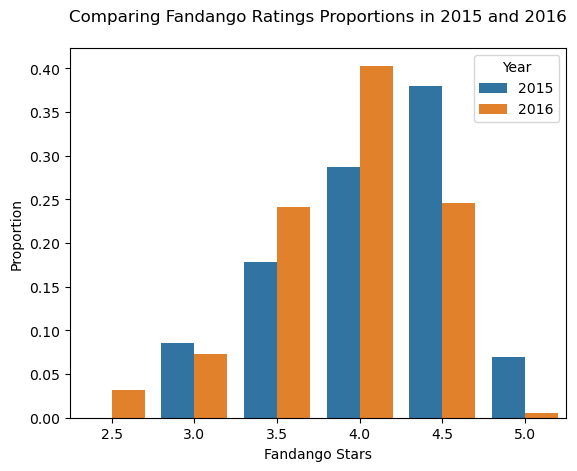

In [19]:
# Combine the two series into a DataFrame
rating_proportions = pd.DataFrame({
    '2015': rating_proportions_2015,
    '2016': rating_proportions_2016
}).reset_index().melt(id_vars='index', var_name='Year', value_name='Proportion')

# Create the grouped bar plot
sb.barplot(data=rating_proportions, x='index', y='Proportion', hue='Year')
plt.title('Comparing Fandango Ratings Proportions in 2015 and 2016', y=1.05)
plt.xlabel('Fandango Stars')
plt.ylabel('Proportion')
plt.show()

<p>From the graph above (and the tables with the normalized value counts), we can notice some specific differences between the data from 2015 and 2016. The number of 4.5 and 5.0 star reviews were much higher in 2015 and 2016. Also, only the 2016 movies included any reviews with 2.5 stars. It seems that overall, the data got shifted to the left in 2016.</p>

# Conclusion

<p>There is a real difference in the distributions of Fandango ratings in 2015 and 2016. On average, movies in 2016 were rated lower than those in 2015. While we cannot directly conclude the cause of this, it's very plausible that Fandango adjusted their incorrect rating displays after hearing about Hickey's analysis. In any case, it appears that Fandango ratings are now less inflated than they once were, contributing to a more accurate representation of movie quality.</p>